In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [86]:
df=pd.read_csv('insurance_claim.csv')

In [87]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [88]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [89]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [90]:
df.policy_number.nunique()  #so can be set as index

1000

In [91]:
df.set_index('policy_number',inplace=True)

In [92]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

In [93]:
df._c39

policy_number
521585   NaN
342868   NaN
687698   NaN
227811   NaN
367455   NaN
          ..
941851   NaN
186934   NaN
918516   NaN
533940   NaN
556080   NaN
Name: _c39, Length: 1000, dtype: float64

In [94]:
df=df.drop('_c39',axis=1)

In [95]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
policy_number,,,,,,,,,,,,,,,,,,,,,
521585,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
342868,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
687698,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
227811,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
367455,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941851,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
186934,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
918516,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N


In [96]:
#identifying variables with '?'

In [99]:
unknowns={}     
for i in list(df.columns):
    
    if(df[i]).dtype==object:
        j=np.sum(df[i]=='?')
        unknowns[i]=j
unknowns=pd.DataFrame.from_dict(unknowns,orient='index')
print(unknowns)

                           0
policy_bind_date           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
incident_location          0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
fraud_reported             0


In [100]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        df[i]=le.fit_transform(df[i])

policy_bind_date
policy_state
policy_csl
insured_sex
insured_education_level
insured_occupation
insured_hobbies
insured_relationship
incident_date
incident_type
collision_type
incident_severity
authorities_contacted
incident_state
incident_city
incident_location
property_damage
police_report_available
auto_make
auto_model
fraud_reported


In [101]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
policy_number,,,,,,,,,,,,,,,,,,,,,
521585,328,48,532,2,1,1000,1406.91,0,466132,1,...,2,2,71610,6510,13020,52080,10,1,2004,1
342868,228,42,821,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
687698,134,29,186,2,0,2000,1413.14,5000000,430632,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
227811,256,41,766,0,1,2000,1415.74,6000000,608117,0,...,2,1,63400,6340,6340,50720,3,34,2014,1
367455,228,44,181,0,2,1000,1583.91,6000000,610706,1,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941851,3,38,487,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
186934,285,41,129,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
918516,130,34,509,2,1,500,1383.49,3000000,442797,0,...,3,2,67500,7500,7500,52500,11,19,1996,0


In [102]:
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
incident_date                 -0.047726
insured_hobbies               -0.046838
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
property_damage               -0.030497
police_report_available       -0.028159
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
incident_location             -0.008832
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
insured_zip                    0.019368
months_as_customer             0.020544
insured_relationship           0.021043


In [103]:
df.describe()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

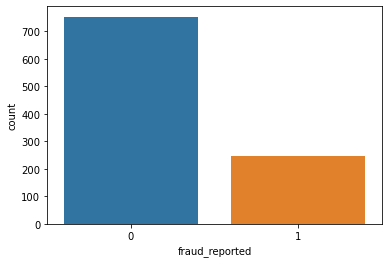

In [104]:
sns.countplot(df['fraud_reported']) #to check how target variable is holding the values

In [105]:
#bivariant analysis

<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

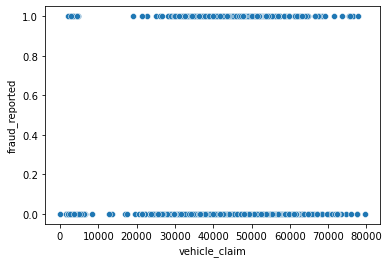

In [106]:
sns.scatterplot(x='vehicle_claim',y='fraud_reported',data=df)

<AxesSubplot:xlabel='policy_bind_date', ylabel='fraud_reported'>

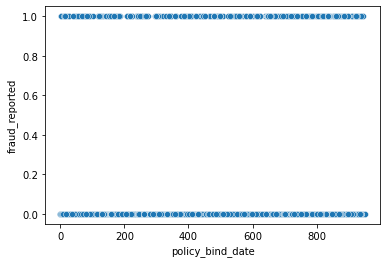

In [107]:
sns.scatterplot(x='policy_bind_date',y='fraud_reported',data=df)

<AxesSubplot:xlabel='age', ylabel='fraud_reported'>

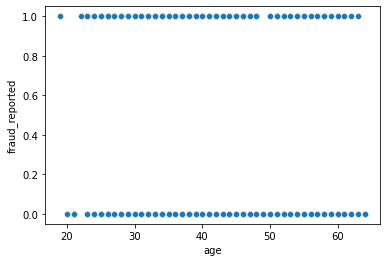

In [108]:
sns.scatterplot(x='age',y='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_date', ylabel='fraud_reported'>

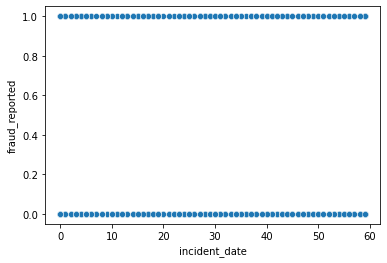

In [109]:
sns.scatterplot(x='incident_date',y='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_hobbies', ylabel='fraud_reported'>

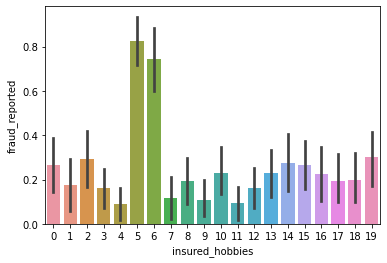

In [110]:
sns.barplot(x='insured_hobbies',y='fraud_reported',data=df)

In [111]:
#from the above bivariant analysis much result cant be drawn


In [112]:
#to check Skewness

In [113]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <Axes

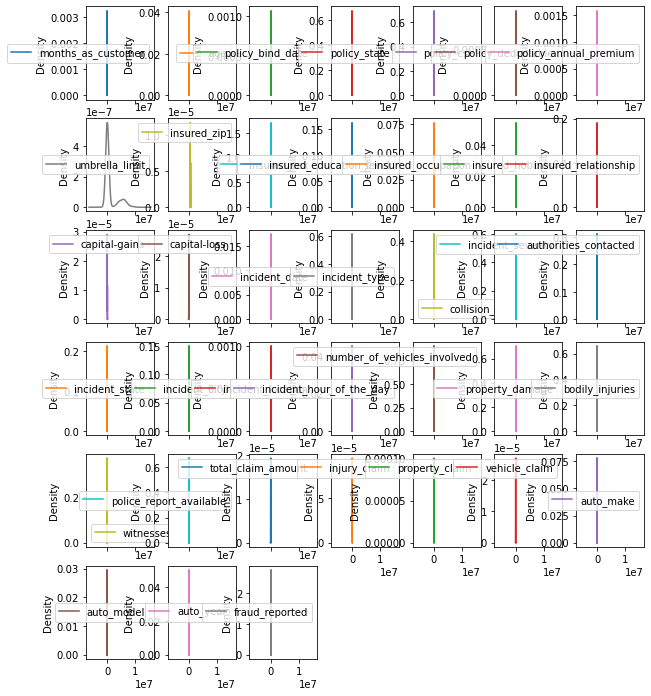

In [114]:
df.plot(kind='kde',subplots=True,layout=(6,7),figsize=(10,12))

In [115]:
#we see little skewness in some columns

months_as_customer                AxesSubplot(0.125,0.772143;0.0945122x0.107857)
age                            AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
policy_bind_date               AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
policy_state                   AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
policy_csl                     AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
policy_deductable              AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
policy_annual_premium          AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
umbrella_limit                    AxesSubplot(0.125,0.642714;0.0945122x0.107857)
insured_zip                    AxesSubplot(0.238415,0.642714;0.0945122x0.107857)
insured_sex                    AxesSubplot(0.351829,0.642714;0.0945122x0.107857)
insured_education_level        AxesSubplot(0.465244,0.642714;0.0945122x0.107857)
insured_occupation             AxesSubplot(0.578659,0.642714;0.0945122x0.107857)
insured_hobbies             

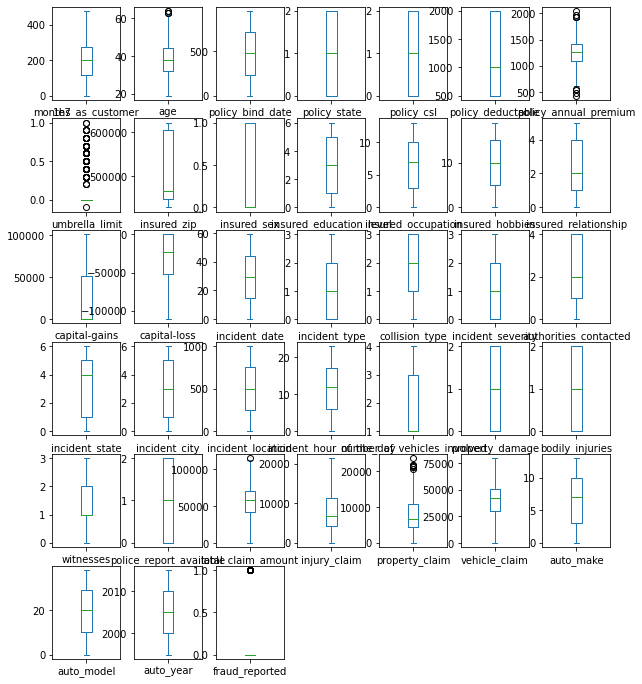

In [116]:
#to check outliers
df.plot(kind='box',subplots=True,layout=(6,7),figsize=(10,12))

In [117]:
# WE FIND OUTLIERS IN FEW COLUMNS


In [118]:
#TO REMOVE OUTLIERS

In [119]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1000, 38)

In [120]:
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 32,  7,  7,  7,  6, 15,
        7,  7,  7], dtype=int64))


In [121]:
len(np.where(z>3)[0])

20

In [122]:
df_new=df[(z<3).all(axis=1)]
print('new shape',df_new.shape)
print('old_shape',df.shape)


new shape (980, 38)
old_shape (1000, 38)


In [123]:
loss_data=(1000-980)/1000*100
print('percentage of loss',loss_data)

percentage of loss 2.0


In [124]:
#negligible loss of data

In [125]:
#splitting the data

In [127]:
x=df.drop(['fraud_reported'],axis=1)
y=df['fraud_reported']

In [128]:
#To remove skewness

In [129]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [130]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.05127872,  1.00873272,  0.29555361, ...,  0.85911096,
        -1.80834465, -0.19745541],
       [ 0.30453584,  0.43143333,  1.18293655, ...,  0.41861586,
        -0.58622515,  0.30262249],
       [-0.51122603, -1.13951302, -1.00500009, ..., -0.55514878,
         0.94490524,  0.30262249],
       ...,
       [-0.54970642, -0.47044379,  0.21941272, ...,  1.07113608,
         0.04546316, -1.49627768],
       [ 1.9126537 ,  2.13055434,  0.42889669, ..., -1.44076333,
        -1.30534129, -1.17624558],
       [ 1.90009963,  1.98572613, -0.30581497, ...,  0.41861586,
        -0.58622515,  0.30262249]])

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.72
[[129  21]
 [ 35  15]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       150
           1       0.42      0.30      0.35        50

    accuracy                           0.72       200
   macro avg       0.60      0.58      0.59       200
weighted avg       0.69      0.72      0.70       200



accuracy score of GaussianNB() is:
0.64
[[103  47]
 [ 25  25]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       150
           1       0.35      0.50      0.41        50

    accuracy                           0.64       200
   macro avg       0.58      0.59      0.58       200
weighted avg       0.69      0.64      0.66       200



accuracy score of SVC() is:
0.72
[[136  14]
 [ 42   8]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       150
           1       0.36      0.16      0.22

In [133]:
# we are find the accuracy of the model dtc is 77% but the f1score is less so we shall apply smote to the above data

In [ ]:
#apply smote to balacne the target variable

In [135]:
from imblearn.over_sampling import SMOTE  

In [136]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)

In [137]:
trainx.shape

(1506, 37)

In [138]:
trainy.shape

(1506,)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,random_state=42,test_size=0.20)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    predm=m.predict(x_test)
    print ('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression() is:
0.7450331125827815
[[104  38]
 [ 39 121]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       142
           1       0.76      0.76      0.76       160

    accuracy                           0.75       302
   macro avg       0.74      0.74      0.74       302
weighted avg       0.75      0.75      0.75       302



accuracy score of GaussianNB() is:
0.6920529801324503
[[ 73  69]
 [ 24 136]]
              precision    recall  f1-score   support

           0       0.75      0.51      0.61       142
           1       0.66      0.85      0.75       160

    accuracy                           0.69       302
   macro avg       0.71      0.68      0.68       302
weighted avg       0.71      0.69      0.68       302



accuracy score of SVC() is:
0.8741721854304636
[[121  21]
 [ 17 143]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       142
 

In [140]:
#For the smote applied data we found that accuracy is improved and the f1 score is also imporved.
#so the model can differntiate between fraud if its yes or no

In [141]:
#we are getting highest accuracy with SVC and f1 score of 86%

In [146]:
#Cross Validation

In [144]:

from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_test)

In [145]:
for j in range(2,10):
    lsscore= cross_val_score(svc,trainx,trainy,cv=j)
    lsc= lsscore.mean()
    print('at cv=',j)
    print('cross validation score is',lsc *100)
    print('accuracy_score is',lss*100)
    print('\n')

at cv= 2
cross validation score is 84.26294820717132
accuracy_score is 83.44370860927152


at cv= 3
cross validation score is 84.4621513944223
accuracy_score is 83.44370860927152


at cv= 4
cross validation score is 86.12647440600486
accuracy_score is 83.44370860927152


at cv= 5
cross validation score is 86.19414314316516
accuracy_score is 83.44370860927152


at cv= 6
cross validation score is 86.58698539176626
accuracy_score is 83.44370860927152


at cv= 7
cross validation score is 86.85800418358559
accuracy_score is 83.44370860927152


at cv= 8
cross validation score is 85.9995919171451
accuracy_score is 83.44370860927152


at cv= 9
cross validation score is 86.66872603998353
accuracy_score is 83.44370860927152




In [ ]:
#The cross validation and accuracy score are almsot same hence the model is working fine.

In [ ]:
#ensemble method may over fit the model

GridSearch CV and Hyperparameter Tuning

In [147]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [148]:
print(clf.best_estimator_)

SVC(C=10)


In [149]:
clf_predictions = clf.predict(x_test)
 
# print classification report
print(classification_report(y_test, clf_predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       142
           1       0.87      0.92      0.89       160

    accuracy                           0.88       302
   macro avg       0.89      0.88      0.88       302
weighted avg       0.89      0.88      0.88       302



In [ ]:
AUC ROC Curve

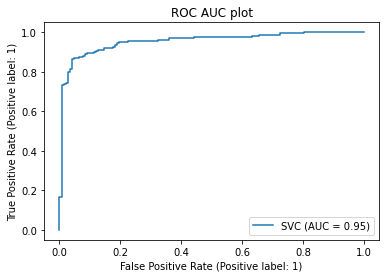

In [150]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,x_test,y_test)
plt.title('ROC AUC plot')
plt.show()

In [151]:
#we are getting a good AUC curve hence the model is able to differentiate  the fraud report at 95% accuracy

In [152]:
import joblib
joblib.dump(clf.best_estimator_,'insurance_fraud_report.pkl')

['insurance_fraud_report.pkl']